<a href="https://colab.research.google.com/github/Monferium/APM1210/blob/main/1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataFrame head:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-N

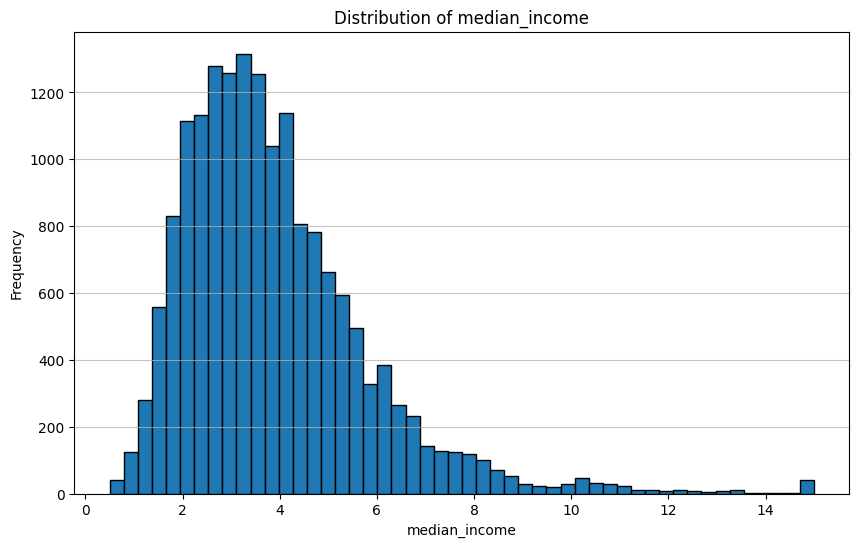

In [ ]:
# prompt: how to call a sample data here in google collab, your task is to make a histogram distribution to any csv files already saved here in google collab, kindly show me the python way, and how to file directory, also via comments, how to insert new datasets from outside google collab

import pandas as pd
import matplotlib.pyplot as plt

# To access sample datasets provided by Colab, you can find them here:
# /content/sample_data/
# For example, the "california_housing_train.csv" is a sample dataset.

# To specify the file directory for a local CSV file in your Colab environment:
file_path = '/content/sample_data/california_housing_train.csv'

# To insert new datasets from outside Google Colab:
# 1. Use the 'files.upload()' function from google.colab:
#    from google.colab import files
#    uploaded = files.upload()
#    # This will open a file uploader. After uploading, you can access the file
#    # using the filename as a key in the 'uploaded' dictionary.
#    # For example, if you upload 'my_data.csv', you would use:
#    # file_path = 'my_data.csv'
# 2. Mount your Google Drive:
#    from google.colab import drive
#    drive.mount('/content/drive')
#    # Then, you can access files in your Drive, e.g., '/content/drive/My Drive/my_folder/my_data.csv'

# Load the CSV file into a pandas DataFrame
try:
  df = pd.read_csv(file_path)

  # Display the first few rows and information about the DataFrame
  print("DataFrame head:")
  print(df.head())
  print("\nDataFrame info:")
  df.info()

  # Choose a numerical column for the histogram.
  # Let's use 'median_income' from the sample dataset.
  column_to_plot = 'median_income'

  # Check if the column exists in the DataFrame
  if column_to_plot in df.columns:
    # Create a histogram distribution of the chosen column
    plt.figure(figsize=(10, 6))
    plt.hist(df[column_to_plot], bins=50, edgecolor='black') # You can adjust the number of bins
    plt.title(f'Distribution of {column_to_plot}')
    plt.xlabel(column_to_plot)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
  else:
    print(f"\nError: Column '{column_to_plot}' not found in the DataFrame.")

except FileNotFoundError:
  print(f"\nError: File not found at '{file_path}'")
except Exception as e:
  print(f"\nAn error occurred: {e}")


I want you to cry, cry for me - TWICE

In [2]:
print("Heartbreak Avenue")

Heartbreak Avenue
